In [105]:
import numpy as np
from time import time
from matplotlib import pyplot as plt

# Comparações

> Este notebook tem o intuito de realizar experimentos práticos para estimar o tempo de 1000000 comparações, sendo elas divididas em comparações de Igualdade (==) e Diferença (!=)
>> Inicialmente o teste contará com 300 repetições de 1000000 comparações para cada tipo de comparação, veremos adiante se este número é o ideal

In [106]:
n = 10**6          # numero de operações
N = range(n)      
r = 300       # numero de repetições
R = range(r)

x = 100

tci = []        # vetor de tempo igualdade
tcd = []        # vetor de tempo diferença

si = []        # vetor de desvio igualdade
mi = []        # vetor de media igualdade
vi = []        # vetor de variabilidade igualdade

sd = []        # vetor de desvio diferença
md = []        # vetor de media diferença
vd = []        # vetor de variabilidade diferença



for j in R:
    #Igualdade
    tic = time()
    for i in N:
        i == x
    toc = time()
    
    tci.append(toc - tic)
    si.append(np.std(tci))
    mi.append(np.mean(tci))
    vi.append(np.std(tci)/np.mean(tci))


    #Diferença
    tic = time()
    for i in N:
        i != x
    toc = time()
    
    tcd.append(toc - tic)
    sd.append(np.std(tcd))
    md.append(np.mean(tcd))
    vd.append(np.std(tcd)/np.mean(tcd))

print("Algoritmo finalizado")

Algoritmo finalizado


## Variabilidade 

In [107]:
VI = np.mean(vi)
VD = np.mean(vd)

print("Variabilidade média da igualdade: " +str(VI)+ " segs")
print("Variabilidade média da diferença: " +str(VD)+ " segs")

Variabilidade média da igualdade: 0.027608375202414215 segs
Variabilidade média da diferença: 0.02850442248170566 segs


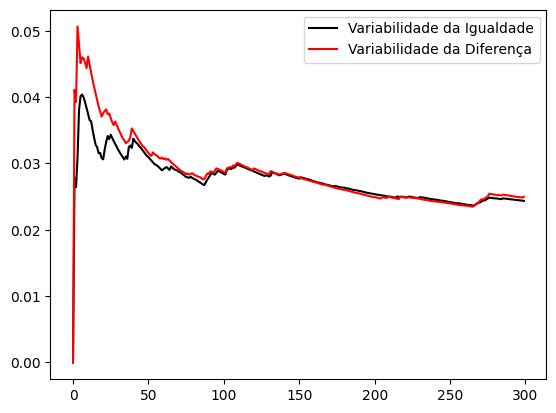

In [108]:
plt.plot(vi, 'k')
plt.plot(vd, 'r')

plt.legend(["Variabilidade da Igualdade",
            "Variabilidade da Diferença"])

plt.show()

> Percebemos que a variabilidade média nos dois casos são abaixo de 0.15, fator indicador de qualidade nos teste. Caso a variabilidade fosse maior do que 0.15, os testes não poderiam continuar. Uma possível solução para melhorar a variabilidade é aumentar o número de repetições.
>
> O gráfico acima também nos indica uma estabilidade na variabilidade por volta das 120 repetições até as 300 repetições, o que confirma que o número de 300 repetições é o ideal para o experimento, podendo até ser menos.

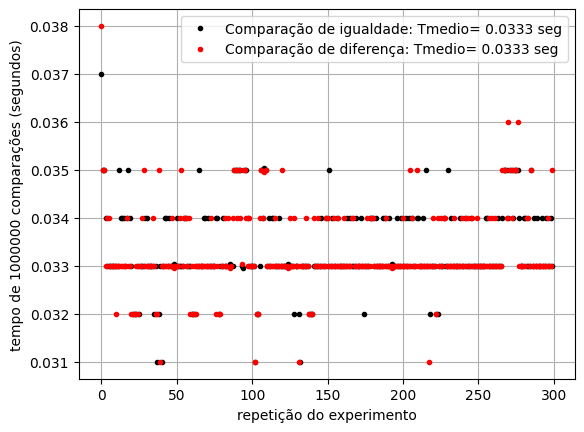

In [109]:
#plotando resultados brutos

TCI = np.mean(tci)
TCD = np.mean(tcd)

plt.plot(R,tci,'k.')
plt.plot(R,tcd,'r.')

plt.legend(["Comparação de igualdade: Tmedio= {:.3g}".format(TCI)+" seg",
            "Comparação de diferença: Tmedio= {:.3g}".format(TCD)+" seg"])
plt.xlabel("repetição do experimento")
plt.ylabel("tempo de " +str(n)+ " comparações (segundos)")
plt.grid()
plt.show()

> É perceptível que o tempo médio das comparações de Igualdade e Diferença são muito próximos ou iguais, tendo uma deferença quase insignificante.

## Histograma Igualdade

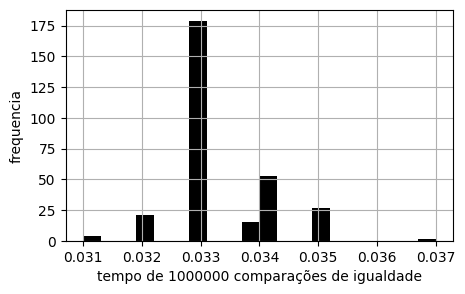

In [110]:
plt.figure(figsize=(5,3))
plt.hist(tci, 20, color = 'black')
plt.xlabel("tempo de " +str(n)+ " comparações de igualdade")
plt.ylabel("frequencia")
plt.grid()
plt.show()

## Histograma Diferença

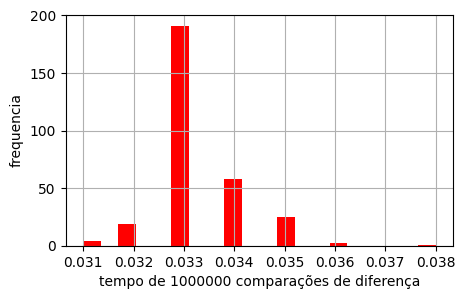

In [111]:
plt.figure(figsize=(5,3))
plt.hist(tcd, 20, color = 'red')
plt.xlabel("tempo de " +str(n)+ " comparações de diferença")
plt.ylabel("frequencia")
plt.grid()
plt.show()

> É perceptível uma distribuição Gaussiana nos dois casos, que é um indicativo de qualidade e que confirma as variabilidades demonstradas anteriormente.

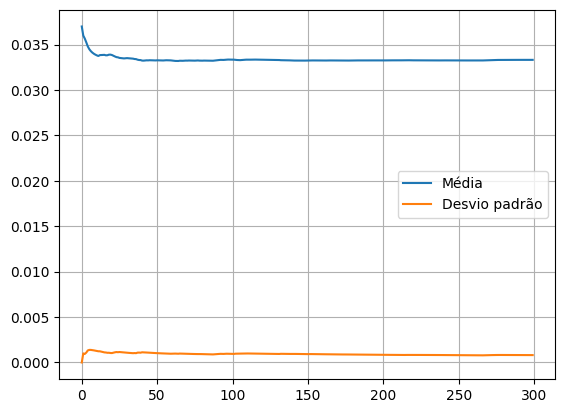

In [112]:
plt.plot(mi)
plt.plot(si)
plt.grid()
plt.legend(["Média", "Desvio padrão"])
plt.show()

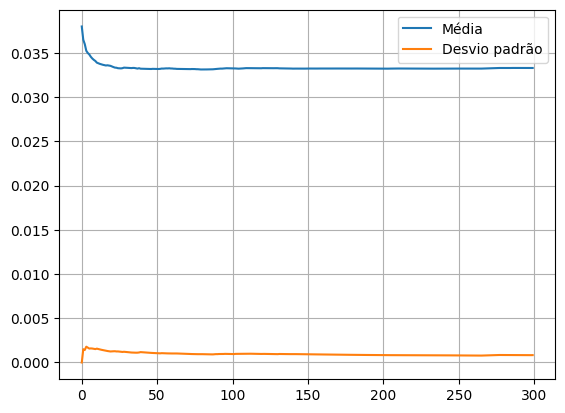

In [113]:
plt.plot(md)
plt.plot(sd)
plt.grid()
plt.legend(["Média", "Desvio padrão"])
plt.show()